# Сборный проект

**Описание проекта**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. 

Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель проекта:** выявить закономерности, которые определяют упешность игры.

**Задачи проекта:**
1) Сделать предобработку данных:найти и обработать пропуски, дубликаты, проверить название столбцов, типы данных и заменить при необходимости;
2) Выполнить исследовательский анализ данных: найти выбросы, аномальные значения и обработать их, найти различные закономерности между данными.
3) Составить портрет пользователя каждого региона
4) Проверить гипотезы

**План:**
1) Предобработка данных:
- Изучим общую инофрмацию о данных;
- Заменим названия столбцов;
- Преобразуем данные в нужные тип;
- Обработаем пропуски при необходимости;
- Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

2) Исследовательский анализ данных:
- Визульно отобразим сколько игр выпускалось в разные годы.
- Оценим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.
- Опеределим какие платформы лидируют по продажам, растут или падают? Веберим несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
3) Проверим гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- 
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

4) Подведем итоги исследования.



## Загрузка и первичный анализ данных

In [6]:
#Подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
from scipy.stats import binom, norm
from math import sqrt
import seaborn as sns

In [7]:
#Сохраняем датасет
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [8]:
#Наглядно оценим данные датасета
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


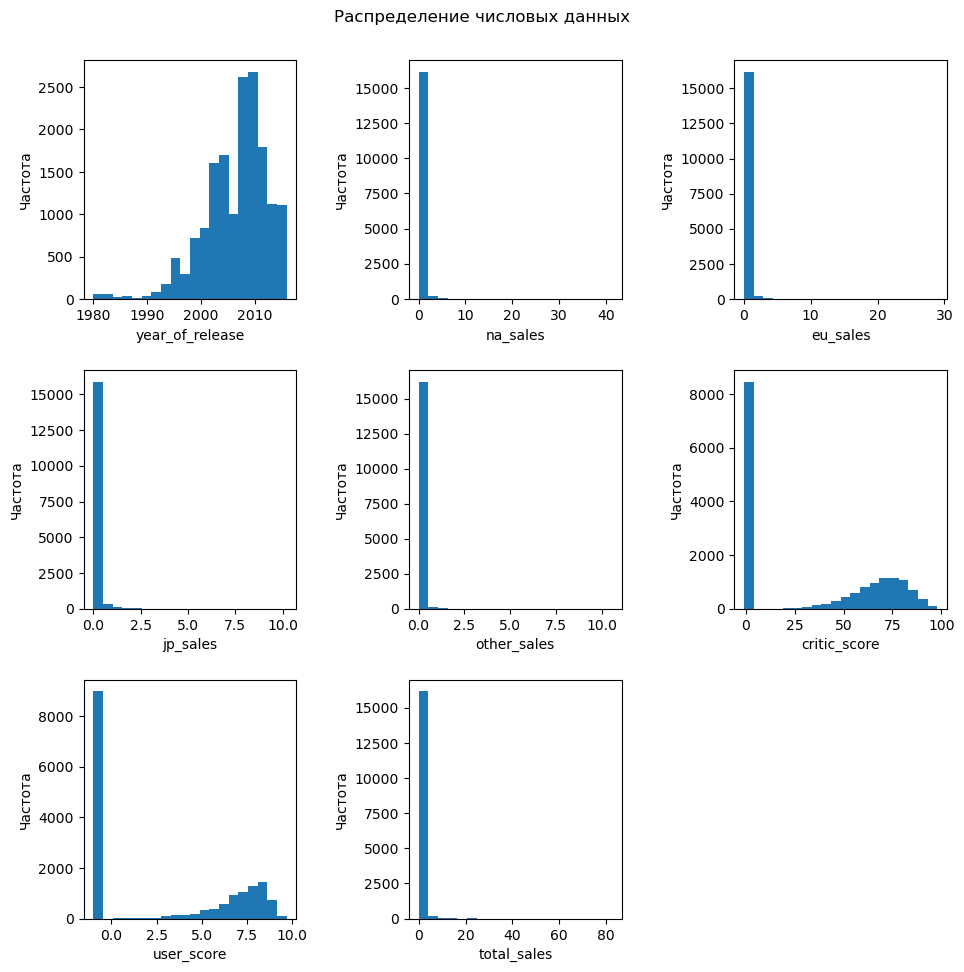

In [205]:
# гистограммы для всех числовых столбцов
fig = plt.figure(figsize=(10,10))
fig.suptitle('Распределение числовых данных')
num_columns = data.select_dtypes(include = 'number').columns

for i in range(len(num_columns)):
    fig.add_subplot(3, 3, i+1)
    plt.hist(data[num_columns[i]], bins = 20)
    plt.ylabel('Частота')
    plt.xlabel(f"{num_columns[i]}")
    plt.tight_layout(pad = 2)

- В данных есть пропуски;
- Неккоректно написаны названия столбцов;
- Тип данных float можно заменить на int в некоторых столбцах
- Каких то особо аномальных значений не замечено

## Предобработка данных

### Обработка названий столбцов и типа данных

In [14]:
# приведём название столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [15]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Теперь все названия столбцов с нижним регистром.

In [17]:
#Поменяем тип данных столбца 'year_of_release' на int
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [18]:
data['year_of_release'].dtype

Int64Dtype()

Год выпуска перевели в тип int.

### Обработка пропусков

In [21]:
#Проверим кол-во пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Так как пропусков в столбцах 'year_of_release' и 'name' не очень много, их просто удалим.

Пропуски в столбце 'name' могут быть связаны с большим кол-вом факторов. Может быть возникли какие либо технические проблемы при сборе данных, или игра выпусилась без названия.

В столбце 'year_of_release' пропуски также могли появиться из-за технических проблем, утрате данных о игре, так как она очень старая.

In [23]:
#Методом dropna() удалим пропуски в столбцах 'year_of_release' и 'name'
data = data.dropna(subset = ['name', 'genre', 'year_of_release']).reset_index(drop = True)

In [24]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Остальные пропуск удалить не получится, потерям много данных.

В данном столбце пропуски могут возникуть из-за утраты информацию, слишком старой игры, когда в принципе рейтинговая система не велась, либо пользователи вообще не ставили отзывы в связи плохим качеством игры.

Проще поставить на них заглушку в виде отрицательной цифры, а потом при анализе по отзывам критиков заглушку отфильтровывать или оставить пропуски. Пропуски не будут мешать при анализе отзывов.

In [26]:
data.loc[data['critic_score'].isna(), 'critic_score'] = -1

В столбце 'user_score' попадает значение "tbd", это я так понимаю оценка пользователей ещё не определена, или будет определена в будущем. 


In [28]:
data.loc[data['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,-1.0,tbd,E


In [29]:
data.loc[data['user_score'] == 'tbd']['platform'].value_counts()

platform
DS      744
Wii     428
GBA     258
PS2     236
XB      146
PSP     118
GC      100
PS3      87
X360     83
3DS      54
PC       49
PS       44
XOne     11
PSV       7
PS4       6
WiiU      5
Name: count, dtype: int64

In [30]:
data['platform'].value_counts()

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

Удалять такие значение нет смысла, так как потеряем много данных по определенным платформам.

Такое обозначение не удобно для дальнейшего анализа данных, поэтому проще заменить на -1.

In [32]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1

Теперь вместо "tbd" будут стоять -1.

Для дальнейшей обработки данных изменим тип данных на float, вместо object.

In [34]:
data['user_score'] = pd.to_numeric(data['user_score'])

In [35]:
data.loc[data['user_score'].isna(), 'user_score'] = -1

В данном столбце пропуски могут возникуть из-за утраты информацию, слишком старой игры, когда в принципе рейтинговая система не велась, либо пользователи вообще не ставили отзывы в связи плохим качеством игры.

Пропуски в столбце 'rating' не так просто заменить. Каждая игра индивидуальна, и может получться так, что заполним пропуски медианным значением для возрастной категории 'дети', а по факту игра будет с взрослыми сценами. 

Заполним пропуски значением 'unknow'.

In [38]:
data.loc[data['rating'].isna(), ['rating']] = 'unknow'

### Обработка дубликатов

In [40]:
#Методом duplicated() и sum() определим кол-ов явных дубликатов
data.duplicated().sum()

0

Явные дубликаты отсутвуют.

Проверим неявные дубликаты.

Попадаются дублирующие названия игр, но у всех разные платформы, поэтому за дубликаты не считаются.

Много попадаются почти схожих названий игр, но в основном это просто разные серии, выпуски, где различия показывают числом серии или дополнительным набором слов.

In [44]:
# проверим неявные дубликаты
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [45]:
# удаляем неявные дубликаты
data.drop_duplicates(subset = ['name', 'platform','year_of_release'], inplace = True, ignore_index = True)

### Добавление нового столбца `total_sales`

In [47]:
#Создадим новый столбец 'total_sales' и сохраним в нем суммарные продажи по регионам 
data['total_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [48]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknow,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknow,31.38


### Вывод по предобработке данных

In [50]:
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

- Удалили пропуски из столбцов 'name' и 'year_of_release'.
- Заменили пропуски в столбцах 'critic_score' и 'user_score' значениями медианы в зависимости от жанра и платформы игры.
- В определенных жанрах и платформах нет данных о рейтинге, поэтому заменили пропуски 0.
- В столбце поменяли  'year_of_release' тип данных на int.
- В столбце поменяли  'user_score' тип данных на float.

## Исследовательский анализ данных

### Кол-во выпускаемых игр в разные года и продажи по платформам

Задачи:
1) Сколько игр выпускалось в разные года?
2) Важны ли данные за весь переиод?
3) Как менялись продажи по платформам?
4) Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам.
5) За какой характерный срок появляются новые и исчезают старые платформы?

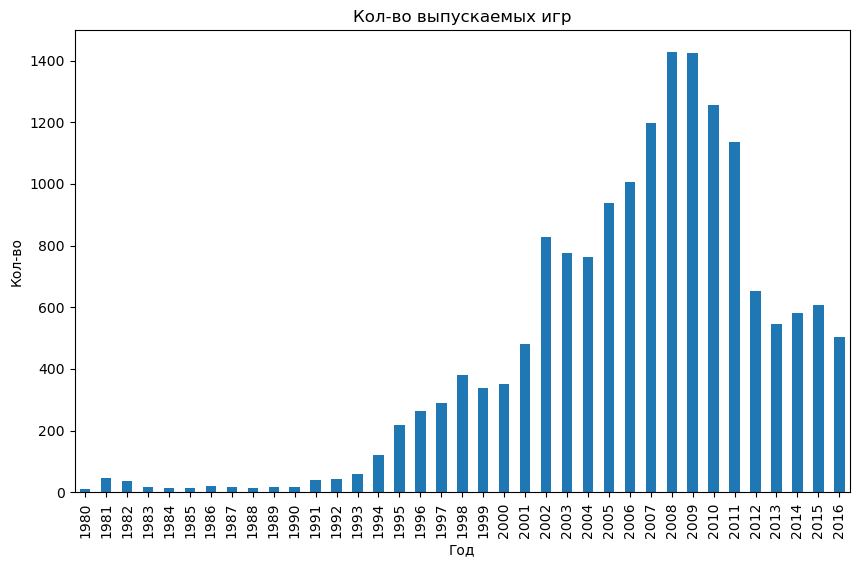

In [55]:
#Методомами groupby() и count() определим кол-во выпускаемых игр по годам, методом plot() наглядно оценим распреление
data.groupby('year_of_release')['year_of_release'].count().\
plot(kind = 'bar', title = 'Кол-во выпускаемых игр', xlabel = 'Год', ylabel = 'Кол-во', figsize = (10, 6))
plt.show()

До 1991 года игр выпускалось совсем немного. 

С 1991 до 2008 года наблюдается общая тенденция роста выпуска игр.

Пик выпускаемых игр в 2007 и 2008 год, затем все пошло на спад.

Скорей всего период до 1991 года не так важен из за малого кол-во выпускаемых игр. 

Посмотрим на каких платформах больше всего продано копий игр.

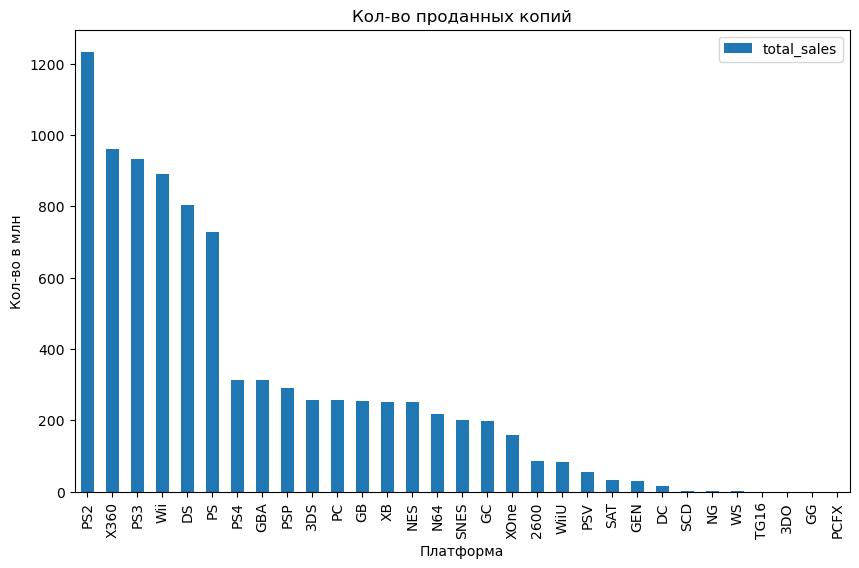

In [57]:
#Методом pivot_table() отсортирем платфоры по суммарным продажам за все года
#Построим столбчатую диграмму методом plot() для наглядности топ платформ по продажам
data.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum')\
.sort_values(by = 'total_sales', ascending = False)\
.plot(kind = 'bar',title = 'Кол-во проданных копий', xlabel = 'Платформа', ylabel = 'Кол-во в млн', figsize = (10, 6))
plt.show()

Платформа PS2 значительно лидирует по продажам копий среди остальных платформ.

Ряд платфром имеют примерно одинаковое кол-во продаж.

Рассмотрим распределение продаж копий игр по годам на топ 6 платформ.



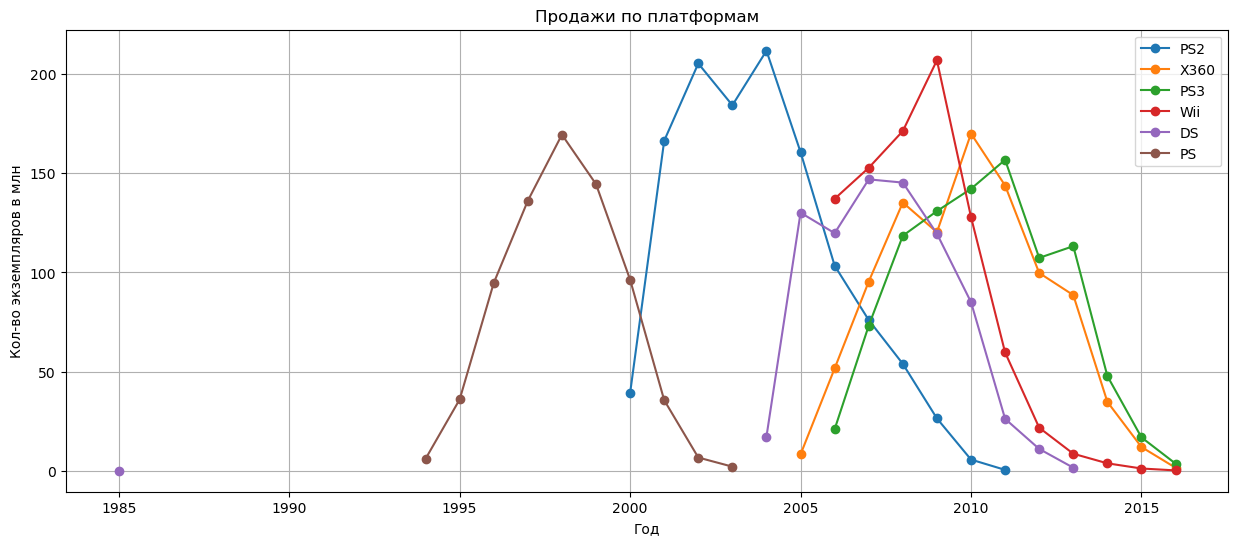

In [59]:
# Сортируем данные по суммарным продажам за каждый год на платформах
data_sales = data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')

# Строим график зависимости количества продаж от времени для каждой платформы
plt.figure(figsize=(15, 6))
for platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
    plt.plot(data_sales.index, data_sales[platform], marker='o', label= platform)


plt.xlabel('Год')
plt.ylabel('Кол-во экземпляров в млн')
plt.title('Продажи по платформам')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
# посмотрим что за платфоррма спряталась в 1985 году
display(data.loc[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)])
print('')
display(data.loc[(data['platform'] == 'DS'), 'year_of_release'].sort_values().head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,unknow,0.02


15704    1985
13253    2004
11339    2004
4360     2004
7778     2004
Name: year_of_release, dtype: Int64

Явно ошибка, такой платформмы просто не могло быть в 195 году, удалим данную строку.

In [62]:
#Удалим строку с индексом 15704
data.drop(15704, inplace= True)
#Восстановим нумерацию индексов
data = data.reset_index(drop = True)

In [63]:
#Проверим удалилась ли строка с годом 1985
display(data.loc[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)])
display(data.loc[(data['platform'] == 'DS'), 'year_of_release'].sort_values().head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


4360     2004
12889    2004
11339    2004
6479     2004
13939    2004
Name: year_of_release, dtype: Int64

In [64]:
# Опредлим срок жизни платформы
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

В основном платформы существуют примерно 7 лет.

PS появляется примерно в 1994 году, затем через 6 лет PS2, потом через 4 года DS, а дальше на появление новых платформ уходит все меньше времени, скорей всего это связано с быстрым развитием компьютерных технологий.

Для прогноза на 2017 год нужно выбрать актульный период. 

Возьмём 2013 год за актуальный, так как к 2017 году(пройдет 4 года), новые платформы будут иметь максимальные показатели продаж или близкие к ним, а сами платформы врядли исчезнут за этот период.

In [66]:
#Сохраним новый датасет с годом выпуска большим или равным 2013
data_2013 = data[data['year_of_release'] >= 2013]

In [67]:
data_2013.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknow,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknow,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


###  Продажи по платформам с 2013 года

Задачи:
1) Опредить потенциально прибильные платформы.
2) Построить диграмму размаха по продажам на платформах и сделать на основе этого выводы.

In [70]:
#Создадим сводную таблицу суммарной продажи игр по платформам с 2013 года методом pivot_table() 
data_2013.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Платформы DS и PSP не будем рассматривать так как продаж совсем мало.

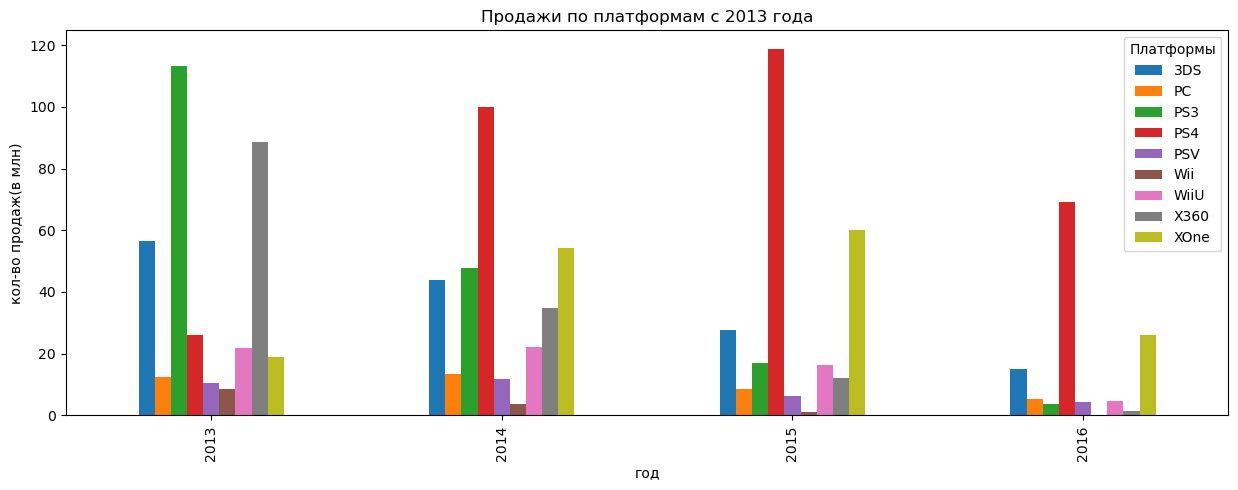

In [72]:
#Наглядно оценим как менялись продажи по платоформам с 2013 года методом plot()
data_2013.query('platform != ("DS", "PSP")').pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize = (15, 5))
plt.legend(title = 'Платформы')
plt.xlabel('год')
plt.ylabel('кол-во продаж(в млн)')
plt.title('Продажи по платформам с 2013 года')
plt.show()

По всем платформам наблюдается общая тенденция спада продаж к 2016 году.

В 2013 году по продажм лидирует PS3.

Затем у PS4 значительно увеличиваются продажи и до 2016 года она занимает лидирующую позицию. У PS3 продажи падают, скорей всего PS4 стала лучше по качеству, производительности, удобству.

В 2016 году PS4 по продажм на 1 месте, на 2 месте XONE, на 3 месте 3DS.

In [74]:
#Методом describe() оценим сколько несколько параметров по продажам на платформах
data_2013.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,303.000000,8.000000,189.000000,345.000000,392.000000,67.000000,358.000000,23.000000,115.000000,186.000000,247.000000
mean,0.472772,0.192500,0.208624,0.525884,0.801378,0.052239,0.092151,0.593913,0.562000,0.735484,0.645020
std,1.381347,0.172026,0.352304,1.451939,1.609456,0.059768,0.153816,0.915432,1.038778,1.663275,1.036139
min,0.010000,0.030000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.067500,0.030000,0.040000,0.060000,0.015000,0.020000,0.045000,0.060000,0.080000,0.060000
50%,0.090000,0.150000,0.080000,0.150000,0.200000,0.020000,0.040000,0.180000,0.200000,0.265000,0.220000
75%,0.280000,0.252500,0.230000,0.510000,0.730000,0.070000,0.110000,0.755000,0.595000,0.795000,0.685000
max,14.600000,0.510000,3.050000,21.050000,14.630000,0.240000,1.960000,3.580000,7.090000,16.270000,7.390000


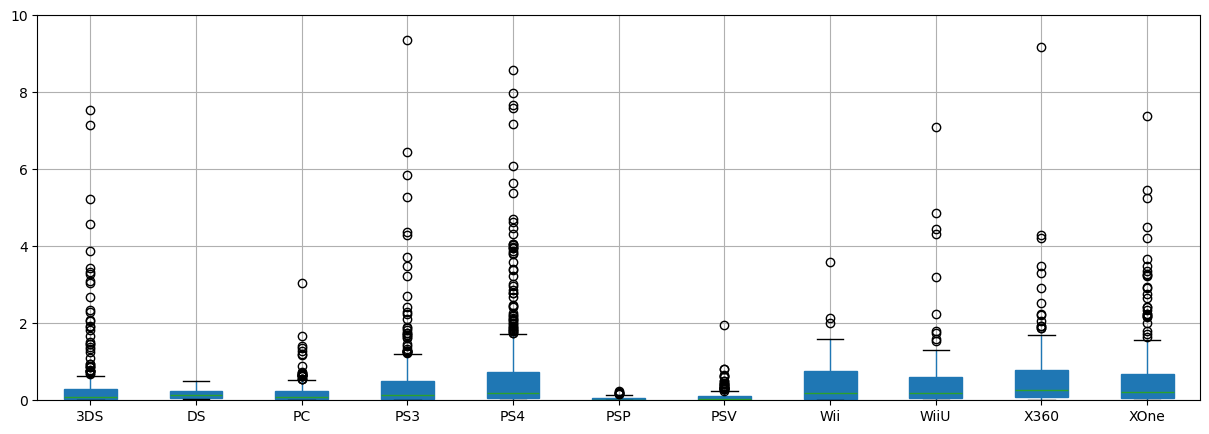

In [75]:
plt.figure(figsize = (15,5))
data_2013.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
.boxplot(patch_artist=True, )
plt.ylim(0, 10)
plt.show()

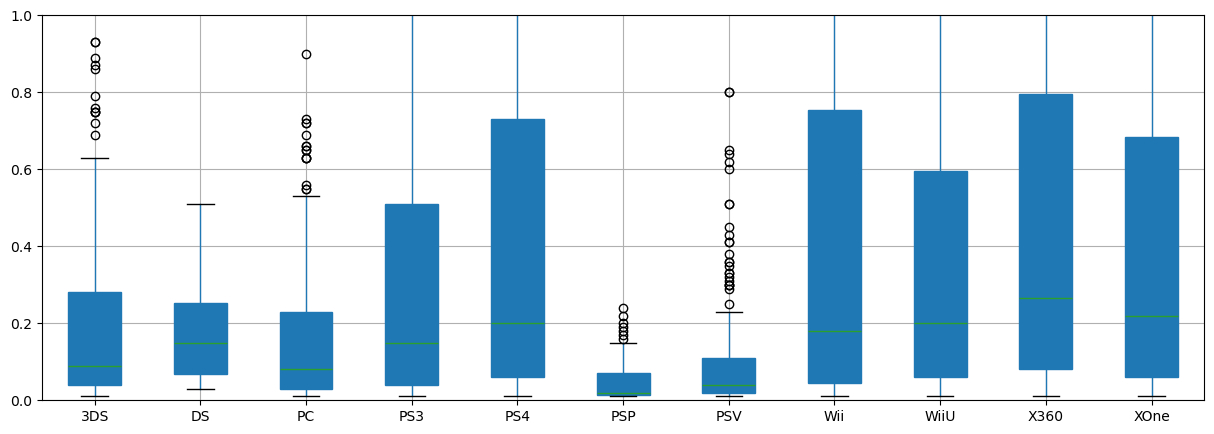

In [76]:
plt.figure(figsize = (15,5))
data_2013.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
.boxplot(patch_artist=True)
plt.ylim(0, 1)
plt.show()

Интересно заметить, что самая продаваемая игра(21 млн копий) была реализована на платформе PS3

Больше всех выпущено игр на платформе PS4, но на платформах X360, XOne, WiiU в среднем игры продавались лучше.

На платформах 3DS и PSV выпусклось также не мало игр, но реализовать их продажи не получилось в большем кол-ве, возможно это связано с большой конкуренций, не очень хорошим качеством, ценой, либо платформы на грани исчезновения, либо только начали свой путь, возможно они созданы под определенную группу пользователей.

Видно что у многих платформ достаточно много выбросов.

PS4 лидирует по продажам за счёт большого кол-ва отдельных игр которые смогли продать гороздо больше, чем все остальные. 

У X360 не так много выбросов, игры продавались в основном в нормальном диапазоне.

Выбросы врядли какие-то неверные данные, скорей всего просто определенные игры оказались досточно хороши для пользовталей и они были готов покупать только их, нежели какие-то стандартные игры.

Из самых прибыльных платформ выделяюся топ 5:
1) X360.
2) XOne.
3) PS4.
4) WiiU.
5) Wii.


###  Влияние на продажи отзывов пользователей и критиков

Задачи:
1) Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами для игровых платформ

Посмотрим есть ли зависимость меджу отзывами и кол-вом продаж на платформе PS4

Так как мы пропуски заполняли '-1', подразумевая отсутствие оценки, не будем учитывать эти данные.

Корреляция между отзывами критиков и кол-вом продаж


0.4065679020617816

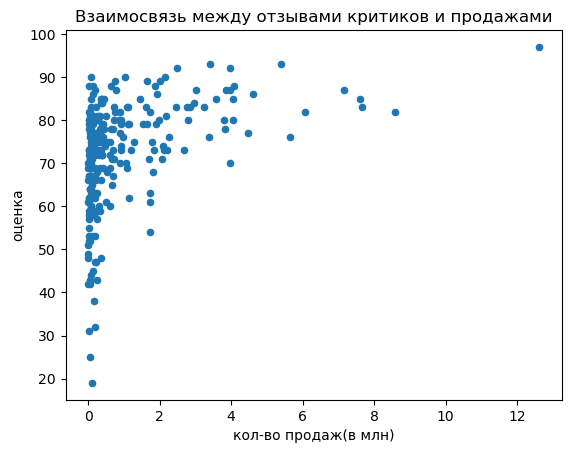

In [81]:
#Построим есть связь между отзывами критиокв и кол-вом продажм с помощью диграммы рассеяния для платформы PS4
#Не будем учитывать пропуски заполненные '-1'
data_2013.query('critic_score != -1 and platform == "PS4"').plot(x = 'total_sales', y = 'critic_score', kind = 'scatter', 
          title = 'Взаимосвязь между отзывами критиков и продажами', xlabel = 'кол-во продаж(в млн)', ylabel = 'оценка')
print('Корреляция между отзывами критиков и кол-вом продаж')
data_2013.query('critic_score != -1 and platform == "PS4"')['total_sales'].corr(data_2013['critic_score'])

Наблюдается слабая зависимость между кол-вом продаж и отзывами критиков.

Есть отдельные случаи когда высокая оценка действително соответсвует большим продажам, но таких случаев мало.

В основном оценки критиков лежат в диапозоне от 60 до 90.

Корреляция между отзывами пользователй и кол-вом продаж


-0.03195711020455643

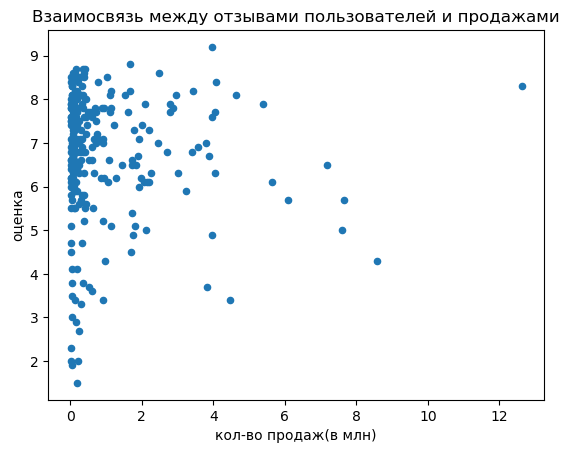

In [83]:
data_2013.query('user_score != -1 and platform == "PS4"').plot(x = 'total_sales', y = 'user_score', kind = 'scatter', 
         title = 'Взаимосвязь между отзывами пользователей и продажами', xlabel = 'кол-во продаж(в млн)', ylabel = 'оценка')
print('Корреляция между отзывами пользователй и кол-вом продаж')
data_2013.query('user_score != -1 and platform == "PS4"')['total_sales'].corr(data_2013['user_score'])

Здесь связь ещё меньше по сравнению с отзывами критиков. Также есть случаи когда высокая оценка соответствует большим продажам.

В основном оценки пользователей лежат в диапозоне от 5 до 9.

Посмотрим взаимосвязь отдельно для всех платформ.


Коэффициент корреляции у платформы PS4 равен 0.4065679020617816 и -0.03195711020455643


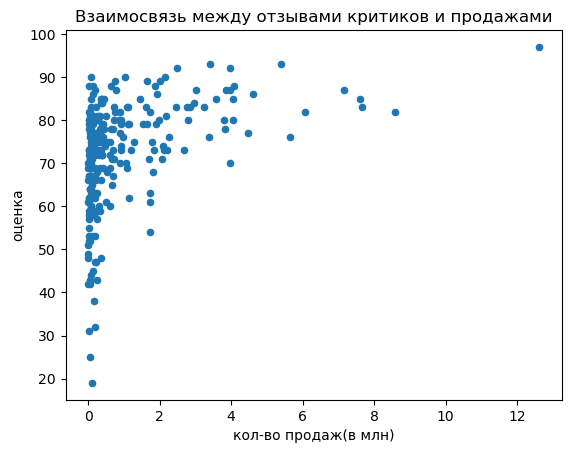

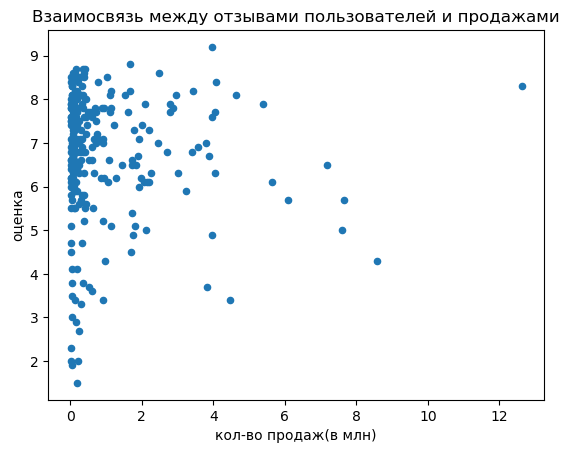


Коэффициент корреляции у платформы X360 равен 0.3503445460228664 и -0.011742185147181351


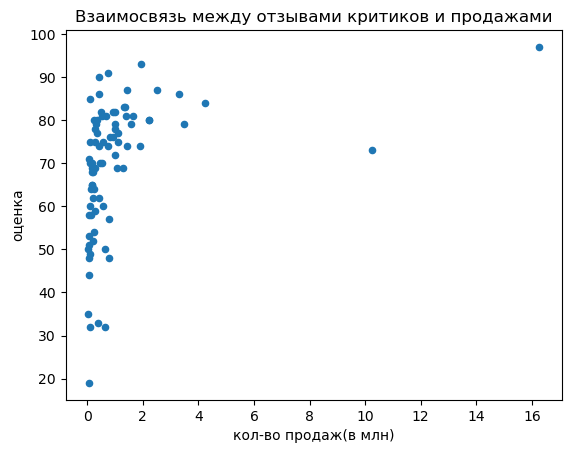

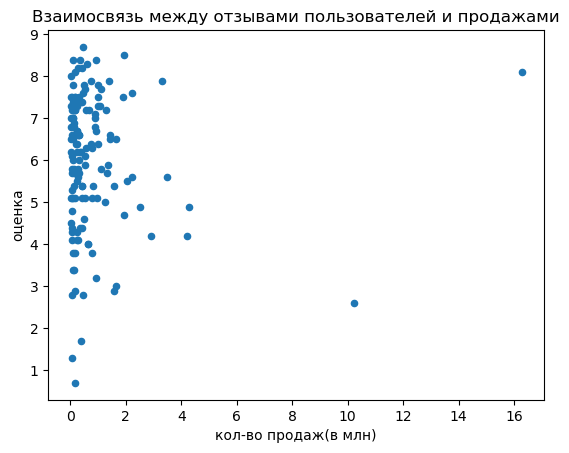


Коэффициент корреляции у платформы WiiU равен 0.3764149065423912 и 0.4193304819266187


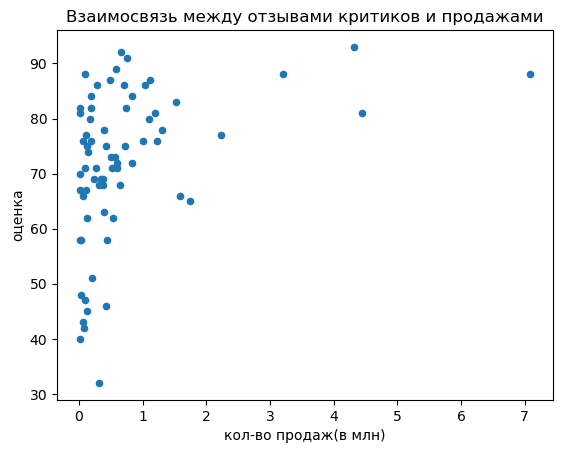

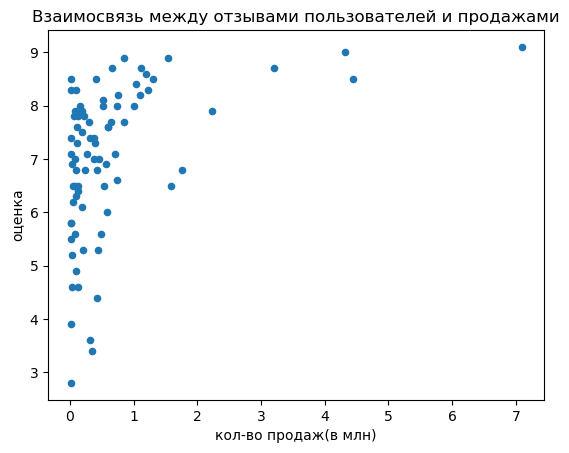

In [85]:
for i in ['PS4', 'X360', 'WiiU']:
    coff_corr_critic = data_2013.query('critic_score != -1 and platform == @i')['total_sales'].corr(data_2013['critic_score'])
    coff_corr_user = data_2013.query('user_score != -1 and platform == @i')['total_sales'].corr(data_2013['user_score'])
    print('')
    print(f'Коэффициент корреляции у платформы {i} равен {coff_corr_critic} и {coff_corr_user}')
    data_2013.query('critic_score != -1 and platform == @i').plot(x = 'total_sales', y = 'critic_score', kind = 'scatter', 
          title = 'Взаимосвязь между отзывами критиков и продажами', xlabel = 'кол-во продаж(в млн)', ylabel = 'оценка')
    data_2013.query('user_score != -1 and platform == @i').plot(x = 'total_sales', y = 'user_score', kind = 'scatter', 
         title = 'Взаимосвязь между отзывами пользователей и продажами', xlabel = 'кол-во продаж(в млн)', ylabel = 'оценка')
    plt.show()

На платформах X360 и PS4 в основном оценка критиков больше влияет на кол-во продаж чем оценка пользователей.

На платформе WiiU оценка критиков меньше влияет на кол-во продаж чем оценка пользователей.

Скорей всего рынок игр Европы и Северной Америки и вправду больше зависит от оценки критиков, нежели от пользователей.

В Японии наоборот оценки критиков и пользовтелей показывают примерно одинаковые положительные коэффициенты корреляции.

В основном наблюдается низкая взаимосвязь оценок и продаж, нет оснований полагать, что чем выше оценка пользователя или критика, тем будет больше продано игр.

### Распределение игр по жанрам

Задачи:
1) Выделить самые популярные и прибыльные жанры.

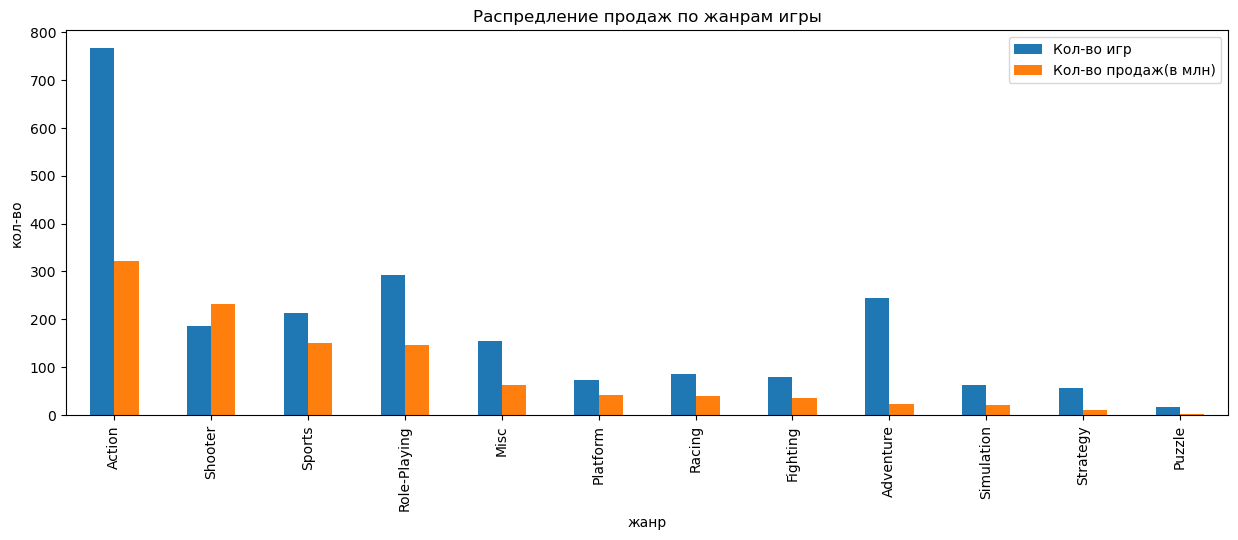

In [89]:
data_2013.pivot_table(index = 'genre', aggfunc = ({'total_sales': 'sum', 'name': 'count'})).sort_values(by = 'total_sales', ascending = False)\
.plot(kind = 'bar', figsize = (15, 5))
plt.title('Распредление продаж по жанрам игры')
plt.legend(['Кол-во игр', 'Кол-во продаж(в млн)'])
plt.xlabel('жанр')
plt.ylabel('кол-во')
plt.show()

В жанре Action выпущено и продано больше всех игр. Возможно популярность связана с тем, что такие игры достаточно динамичны, больше приносят эмоций игроку, и такой жанр включает ещё много поджанров(приключение, боевики...) соотвественно отнимают часть пользователей у игр которые имеют только один жанр и не имеют поджанров.

Жанры Role-Playing, Shooter и Sports также имеют достачно неплохие продажи, опять же эти игры динамичны, требует большой активности, соотвественно приносит больше различных эмоций.

Жанр Adventure выпустил не мало игр, но продажи небольшие. Скорей всего это связано с тем что от игрока требуется больше думать, внимательности, больше читать, нежели выполянть активные дейстивия(сражаться, строить, воевать), вообщем приносит меньше эмоций.


Посмотрим распределение продаж по жанрам.

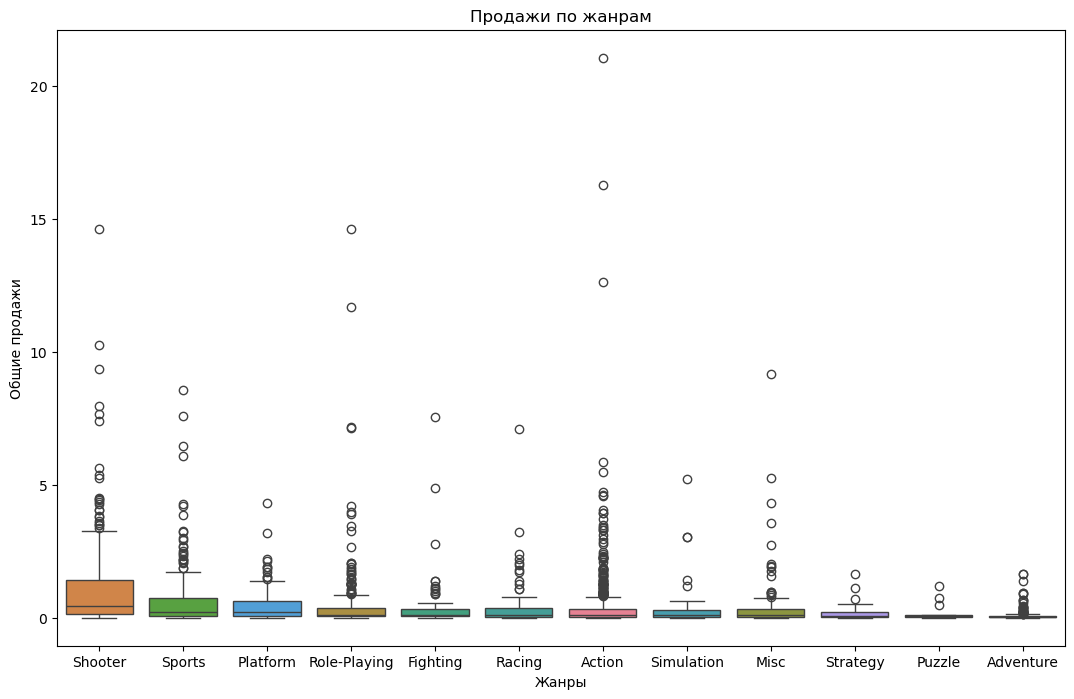

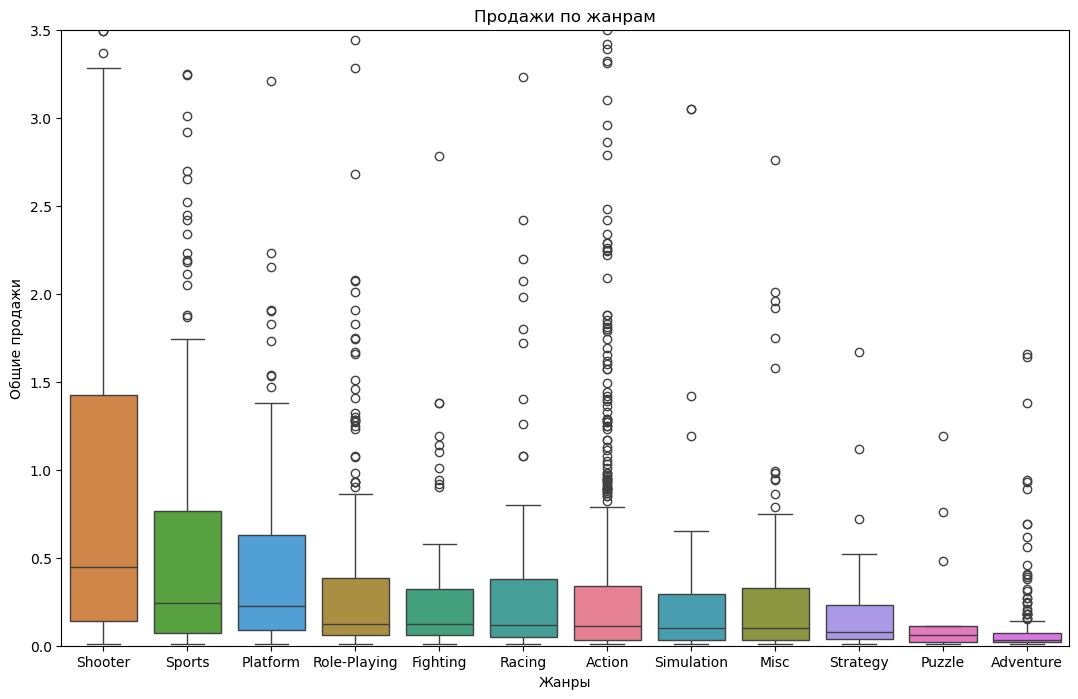

In [92]:
data_temp, y = data_2013.copy(), 'total_sales'
order = data_temp.groupby('genre')[y].median().sort_values(ascending=False).index # сортируем вывод по медиане

plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre', order = order, hue = 'genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()

plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre', order = order, hue = 'genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3.5)))
plt.show()

У жанра Action больше всех вупущено игр, но не все получилось продать успешно, из за чего в среднем продажи с одной игры гороздо хуже остальных.

У жанра Shooter игры продавались всех лучше, соотвественно он является самым прибыльным. Дальше идут жанры Platform, Sports и Racing.

Самым не прибыльным жанром оказался Adventure.

Общие выводы:
- В основном платформы существуют примерно 7 лет.
- Платформы достигают пик продаж по разному, но в основном это 3 года. 
- Cамые прибыльные платформы PS4, XONE, X360 и WiiU.
- Жанр Shooter самый прибыльный.
- Самым не прибыльным жанром оказался Adventure.
- В целом оценки критиков и пользователей слабо влияют на кол-во продаж

##  Портрет пользователя каждого региона

### Доля продаж по платформам и жанрам в разных регионах

Задачи:
1) Выделить топ 5 платформ в каждом регионе и пояснить разницу в долях продаж.
2) Выделить популярные жанры в регионах и пояснить различия.

In [98]:
#Создадим новые переменные для японии, северной америки и европы, где покажем сумму продаж по топ 5 платформам
na = data_2013.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head(5)
jp = data_2013.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head(5)
eu = data_2013.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head(5)

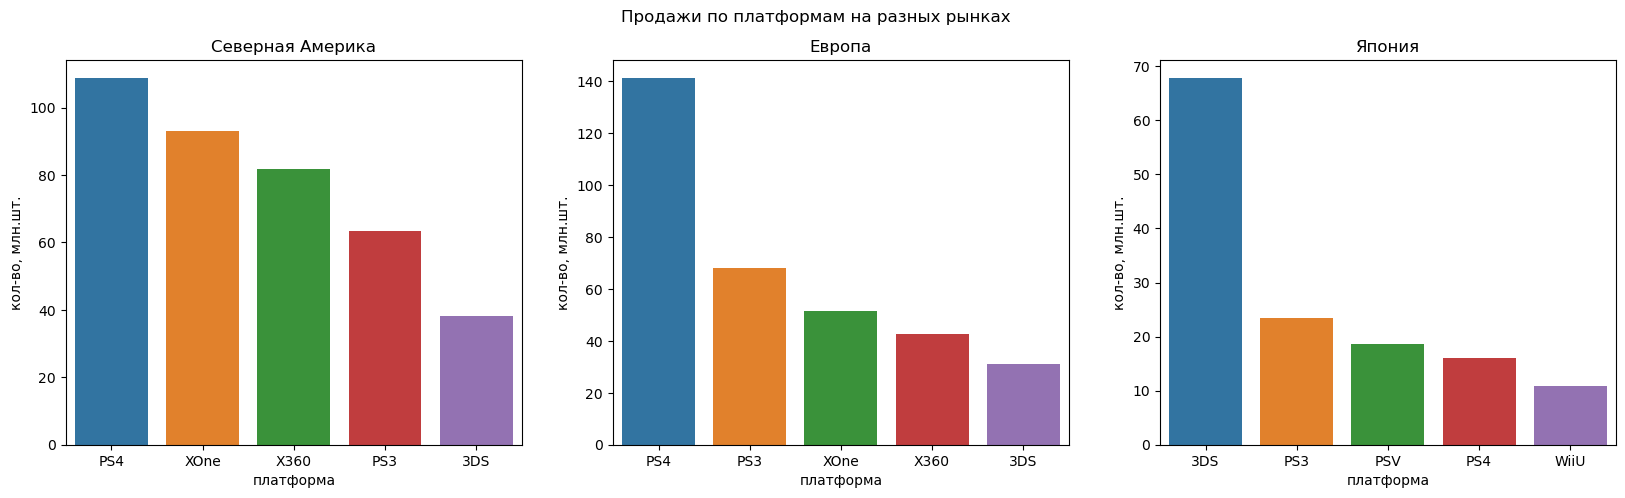

In [203]:
# Отобразим график продаж по жанрам для разных рынков
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Продажи по платформам на разных рынках')

sns.barplot(y='na_sales', x=na.index, data=na, ax=ax[0], hue = na.index)
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('кол-во, млн.шт.')
ax[0].set_xlabel('платформа')

sns.barplot(y='eu_sales', x=eu.index, data=eu, ax=ax[1], hue = eu.index)
ax[1].set_title('Европа')
ax[1].set_ylabel('кол-во, млн.шт.')
ax[1].set_xlabel('платформа')

sns.barplot(y='jp_sales', x=jp.index, data=jp, ax=ax[2], hue = jp.index)
ax[2].set_title('Япония')
ax[2].set_ylabel('кол-во, млн.шт.')
ax[2].set_xlabel('платформа')
plt.show()

In [100]:
#Создадим новый столбец для оценки какую долю от всех продаж занимают платформы на разных рынках
na['share_sales'] = ((na['na_sales']/na['na_sales'].sum())*100).round()
eu['share_sales'] = ((eu['eu_sales']/eu['eu_sales'].sum())*100).round()
jp['share_sales'] = ((jp['jp_sales']/jp['jp_sales'].sum())*100).round()

In [101]:
display(na)
display(eu)
display(jp)

,na_sales,share_sales
platform,,
PS4,108.74,28.0
XOne,93.12,24.0
X360,81.66,21.0
PS3,63.50,16.0
3DS,38.20,10.0


,eu_sales,share_sales
platform,,
PS4,141.09,42.0
PS3,67.81,20.0
XOne,51.59,15.0
X360,42.52,13.0
3DS,30.96,9.0


,jp_sales,share_sales
platform,,
3DS,67.81,50.0
PS3,23.35,17.0
PSV,18.59,14.0
PS4,15.96,12.0
WiiU,10.88,8.0


По Северной Америке:
- Сумма продаж по xone и x360 = 45 %
- Сумма продаж по ps4 и ps3 = 44 %
- Сумма продажи по 3ds = 10 %

По Европе:
- Сумма продаж по xone и x360 = 28 %
- Сумма продаж по ps4 и ps3 = 62 %
- Сумма продажи по 3ds = 9 %

По Японии:
- Сумма продаж по ps4 и ps3 = 43 %
- Сумма продажи по 3ds = 50 %
- Сумма продаж по WiiU = 8 %


Интересно заметить, что xone и x360 не занимают топ 5 в Японии, там преобладают только платформы которые были созданы в своей стране.

По Северной Америке идет конкуренция между американскими и японскими платформами, но суммарно японские платформы(ps4, ps3, 3ds) имеют больше продаж.

В Европе игровой рынок захватили японские платформы (ps4, ps3, 3ds), амереканских платформ меньше(28 %).

В целом японские плафтормы охватывают больше пользователей, имеют больше продаж.

PS4 лидирует по продажам в Европе и Америке, но в Японии почему-то отстают по продажам. Возможно это связано с тем, что компания была нацелена изначально на игровой рынок америки и европы, для получения большей прибыли.




In [103]:
#Создадим новые переменные для японии, северной америки и европы, где покажем сумму продаж по жанрам
na_genre = data_2013.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head()
na_genre_other = data_2013.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).tail(7)
na_genre.loc['other_genre'] = [na_genre_other['na_sales'].sum()]

jp_genre = data_2013.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()
jp_genre_other = data_2013.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).tail(7)
jp_genre.loc['other_genre'] = [jp_genre_other['jp_sales'].sum()]

eu_genre = data_2013.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()
eu_genre_other = data_2013.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).tail(7)
eu_genre.loc['other_genre'] = [eu_genre_other['eu_sales'].sum()]

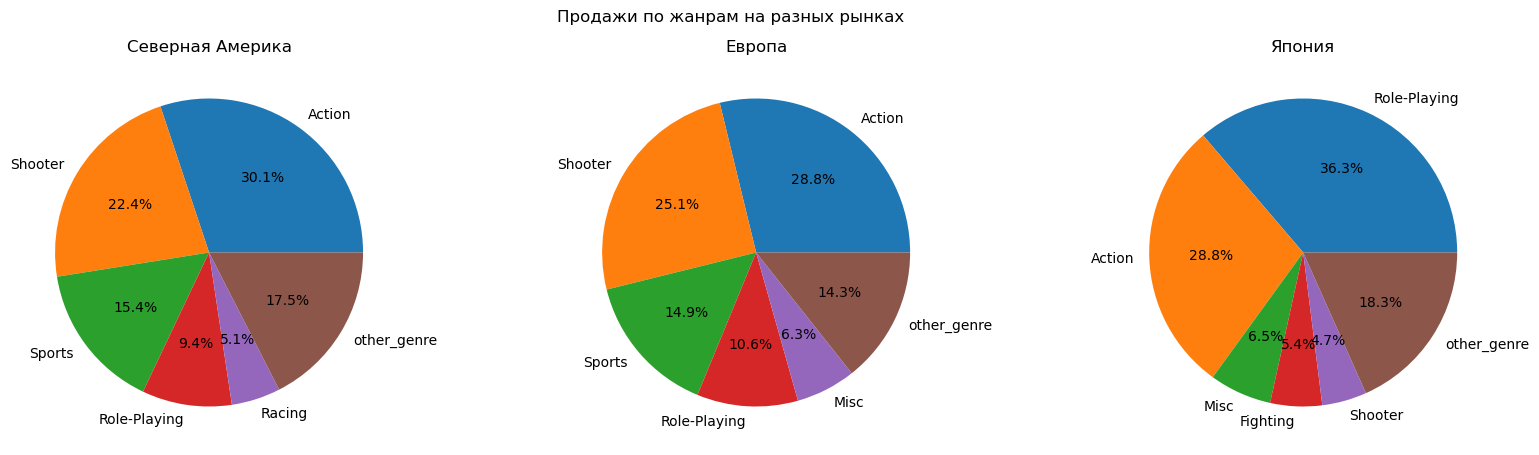

In [104]:
# Доля продаж по жанрам для разных рынков
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Продажи по жанрам на разных рынках')


ax[0].pie(eu_genre['eu_sales'], labels = eu_genre.index, autopct='%1.1f%%')
ax[0].set_title('Северная Америка')

ax[1].pie(na_genre['na_sales'], labels = na_genre.index, autopct='%1.1f%%')
ax[1].set_title('Европа')

ax[2].pie(jp_genre['jp_sales'], labels = jp_genre.index, autopct='%1.1f%%')
ax[2].set_title('Япония')

plt.show()

Рынок Северной Америки и Европы практически схож по игровым жанрам, за исключением жанров Misc и Racing.

Action и Shooter самые продаваемые жанры в Европе и Северной Америке.

В Японии основную долю рынка занимают жанры Role-Playing и Action.



###  Влияние рейтинга ERSB на продажи

Задачи:
1) Определить какую долю продаж составляют разный рейтинга ERSB в регионах.

In [108]:
na_rating = data_2013.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
jp_rating = data_2013.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')
eu_rating = data_2013.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')

In [109]:
#Создадим новый столбец для оценки какую долю от всех продаж занимают различные рейтинги ESRB на разных рынках
na_rating['share_sales'] = ((na_rating['na_sales']/na_rating['na_sales'].sum())*100).round()
jp_rating['share_sales'] = ((jp_rating['jp_sales']/jp_rating['jp_sales'].sum())*100).round()
eu_rating['share_sales'] = ((eu_rating['eu_sales']/eu_rating['eu_sales'].sum())*100).round()

In [110]:
display(na_rating, jp_rating, eu_rating)

,na_sales,share_sales
rating,,
E,79.05,18.0
E10+,54.24,12.0
M,165.21,38.0
T,49.79,11.0
unknow,89.42,20.0


,jp_sales,share_sales
rating,,
E,15.14,11.0
E10+,5.89,4.0
M,14.11,10.0
T,20.59,15.0
unknow,85.05,60.0


,eu_sales,share_sales
rating,,
E,83.36,21.0
E10+,42.69,11.0
M,145.32,37.0
T,41.95,11.0
unknow,78.91,20.0


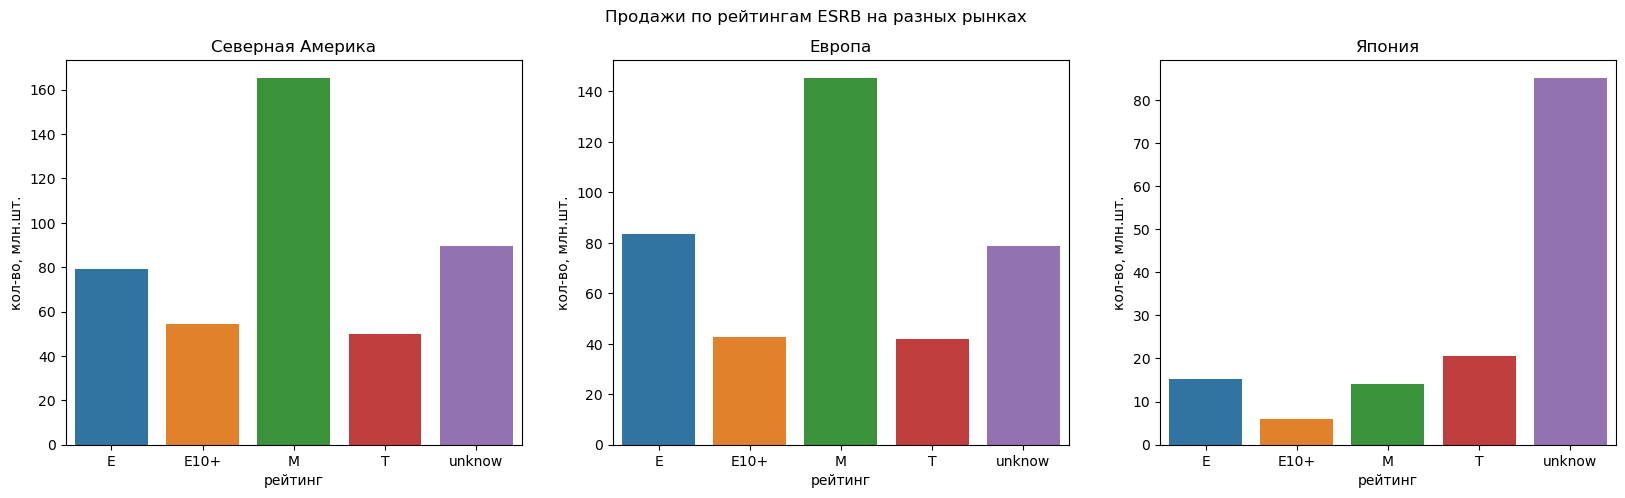

In [201]:
# График продаж в зависимости от рейтинга ESRB для разных рынков
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Продажи по рейтингам ESRB на разных рынках')

sns.barplot(y='na_sales', x=na_rating.index, data=na_rating, ax=ax[0], hue = na_rating.index)
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('кол-во, млн.шт.')
ax[0].set_xlabel('рейтинг')

sns.barplot(y='eu_sales', x=eu_rating.index, data=eu_rating, ax=ax[1], hue = eu_rating.index)
ax[1].set_title('Европа')
ax[1].set_ylabel('кол-во, млн.шт.')
ax[1].set_xlabel('рейтинг')

sns.barplot(y='jp_sales', x=jp_rating.index, data=jp_rating, ax=ax[2], hue = jp_rating.index)
ax[2].set_title('Япония')
ax[2].set_ylabel('кол-во, млн.шт.')
ax[2].set_xlabel('рейтинг')
plt.show()

**ES:** Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует.

**E:** Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. 

**E10+:** Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. 

**T:** Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.

**M:** Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков

**AO:** Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности.

**RP:** Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

В Северной Америке и Европе рынок практически схож. 37% и 38% предпочитают игры рейтинга М для детей старше 17 лет. Всех меньше продаж имеют игры для детей старше 10 и 13 лет.

В Японии рынок значительно отлчичается от других. Здесь в основном покупают игры без рейтинга. Скорей всего это связано с особенностью культуры Японии.

В общем, игры с возрастной категорией М в Европе и Северной Америке пользуется большим спросом, и соотвественно может повлиять на продажи с таким рейтингом в лучшую сторону.

В Японии всё наоборот, наличие рейтинга не сильно влияет на кол-во продаж, здесь покупают игры у которых рейтинг не определен.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Вот такая проблема была с рейтингом. <br>
Дело в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. А в Японии есть свой рейтинг, свой рейтинг есть в ЕС и отдельно в Германии, Австралии и т.д., но по ним в датасете нет данных. То есть, в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе. Необходимо шире смотреть на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. Это необходимо учитывать при предобработке данных.</font>

В итоге получили следующие:

В Северной Америке и Европе лидирующая плафторма PS4,  самые продаваемые жанры Action и Shooter , больше всех предпочитают игры страше 17 лет(ретинг М).

В Японии лидирущая платформа 3DS, основную долю рынка занимают жанры Role-Playing и Action, большинство игр(60%) продаются без рейтинга.

##  Проверка гипотез 

**Гипотеза 1:**

Средние пользовательские рейтинги платформы Xbox One и PC одинаковые.

Нулевая гипотеза: средние пользовательские рейтинги Xbox One и PC равны

Альтернативная гипотеза: средние пользовательские рейтинги Xbox One и PC отличаются

In [118]:
#Для проверки гипотез отсортируем таблицу data_2013 методом query() для платформ XOne и PC
#Не будем учитывать оценки пользоватлей где они неизвестны
data_2013.query('platform == "XOne" and user_score != 0')['user_score']

99      -1.0
165      7.9
179      5.4
241      6.4
269      6.2
        ... 
16357    8.2
16370    6.6
16372   -1.0
16387    6.7
16399   -1.0
Name: user_score, Length: 247, dtype: float64

In [119]:
data_2013.query('platform == "PC" and user_score != 0')['user_score']

455      3.9
1084     7.9
1337     2.2
1423     6.0
1515     5.4
        ... 
16237    7.9
16246    1.4
16344   -1.0
16358   -1.0
16419    7.6
Name: user_score, Length: 189, dtype: float64

In [120]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(data_2013.query('platform == "XOne" and user_score != -1')['user_score'], 
                       data_2013.query('platform == "PC" and user_score != -1')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


При уровне статической значимости 5% мы получили, что с вероятностью 32% средние оценки пользователей платформы XOne и PC могут быть равны.

**Гипотеза 2:**

Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны 

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports отличаются 

In [123]:
#Для проверки гипотез отсортируем таблицу data_2013 методом query() для жанров Action и Sports
#Не будем учитывать оценки пользоватлей где они неизвестны
data_2013.query('genre == "Action" and user_score != -1')['user_score']

16       8.2
23       8.1
42       8.3
149      9.1
165      7.9
        ... 
16324    6.0
16379    8.5
16381    5.1
16387    6.7
16419    7.6
Name: user_score, Length: 389, dtype: float64

In [124]:
data_2013.query('genre == "Sports" and user_score != -1')['user_score']

77       4.3
94       5.0
126      4.3
143      5.7
263      4.5
        ... 
15882    8.8
15886    6.9
16179    4.5
16246    1.4
16370    6.6
Name: user_score, Length: 160, dtype: float64

In [125]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(data_2013.query('genre == "Action" and user_score != -1')['user_score'], 
                       data_2013.query('genre == "Sports" and user_score != -1')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


С очень малой вероятностью, меньше уровня статической значимости, отвергаем нулевую гипотезу в пользу альтернативной. 

Средние пользовательские оценки жанров Action и Sports отличаюся между собой.

Проверим какие средние пользовательские рейтинги жанров Action и Sports больше

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны

Альтернативня гипотеза: средние пользовательские рейтинги жанров Action больше жанра Sports


In [129]:
alpha = 0.05
# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(data_2013.query('genre == "Action" and user_score != -1')['user_score'], 
                       data_2013.query('genre == "Sports" and user_score != -1')['user_score'],
                       alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 5.2589161945700115e-28
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, средние пользовательские рейтинги жанров Action больше жанра Sports. 

In [131]:
data_2013.query('genre == ("Action", "Sports") and user_score != -1').pivot_table(index = 'genre', values = 'user_score' )

,user_score
genre,
Action,6.837532
Sports,5.238125


Нулевую гипотезу формалировал так, чтобы использовать знак равенства. Мы проверям равна ли некоторая велечина определенному числу, и нулевая гипотеза будет предполагать, что равна.

Альтернативную гипотезу формулировал так, что некоторая велечина не равна, больше или меньше определенного числа.

Если значений в выборке много (30 и больше), то распределение Стьюдента настолько близко к нормальному, что можно было бы просто взять нормальное распределение без степеней свободы.
Но чтобы не усложнять себе жизнь выбором нужного теста, принято просто каждый раз применять t-тест — ведь он работает для выборки любого размера.

В данном случае мы сравниваем средние двух генеральных совокупностей. И нам нужно проверитьт нулевую гипотезу о равенстве разности между двумя средними нулю, — это должно быть так, если они равны.
Средние генеральных совокупностей, как и средние взятых из них выборок, могут различаться, но недостаточно сильно, чтобы сделать вывод о том, что эта разница неслучайна. На этот вопрос и отвечает статистический тест: достаточно ли большое различие мы наблюдаем с учётом разброса, чтобы отвергнуть нулевую гипотезу об их равенств

Чтобы понять можно ли применять t-тест нужно проверить 3 условия:
1. Генеральные совокупности не зависят друг от друга.
2. Выборочные средние нормально распределены.
3. Дисперсии рассматриваемых генеральных совокупностей равны.. 





## Вывод

**Предобработка данных:**
- Удалили пропуски из столбцов 'name' и 'year_of_release'.
- Заменили пропуски в столбцах 'critic_score' и 'user_score' значениями '-1'.
- В столбце поменяли  'year_of_release' тип данных на int.
- В столбце поменяли  'user_score' тип данных на float.
- В столбце 'rating' пропуски заменили на значение 'unknow'

**Исследовательский анализ данных:**
- В основном платформы существуют 7 лет.
- Платформы достигают пик продаж в основном за 3 года.
- Cамые успешыне платформы по продажам PS4, XONE, X360.
- Жанр Shooter самый прибыльный.
- Жанр Adventure самый не прибыльный.
- Оценка критиков и пользователей не сильно влияет на продажи игр.

**Портрет пользователя:**
- В Северной Америке и Европе предпочитают платформу PS4 с жанрами Action и Shooter для возрастного ограничения М(старше 17 лет).
- В Японии лидирующая платформа 3DS с жанрами Role-Playing и Action, большинство игр(60%) продаются без рейтинга.

**Проверка гипотез:**
- Средние пользовательские рейтинги платформы Xbox One и PC c вероятностью 32% могут быть равны.
- Средние пользовательские оценки жанров Action и Sports отличаются между собой.
- Cредние пользовательские оценки жанров Action больше жанра Sports.

По Европе:
- Лидер по продажм платформа PS4.
- Жанр Shooter и Action занимает основную долю по продажам.
- В основном предпочитают игры для взрослых с рейтингом М по ERSB.
- Отзывы слабо влияют на успех продаж.

По Северной Америке: все тоже самое как и в Европе.

По Японии:
- Лидер по продажм платформа 3DS.
- Основную долю рынка занимают жанры Role-Playing и Action.
- Рейтингом ERSB можно не учитывать.
- Отзывы слабо влияют на успех продаж.

Выберем рынок Европы, платформу PS4, игры с жанром Action в сочетании Shooter с категорией возраста больше 17 лет(рейтинг M по ERSB).